<a href="https://colab.research.google.com/github/venkateshblks/simple_linear_regression/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:

salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [3]:
salary.shape

(30, 2)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary[salary.duplicated()]

,YearsExperience,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x7dc75328cdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dc75328d330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dc75328cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7dc75328d870>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dc75328db10>],
 'means': []}

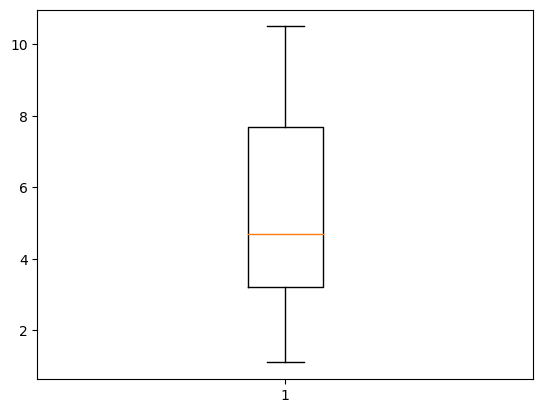

In [7]:
plt.boxplot(salary.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x7dc75116ba30>,
 'caps': [<matplotlib.lines.Line2D at 0x7dc75116be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dc75116b790>],
 'medians': [<matplotlib.lines.Line2D at 0x7dc7511a43d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dc7511a4670>],
 'means': []}

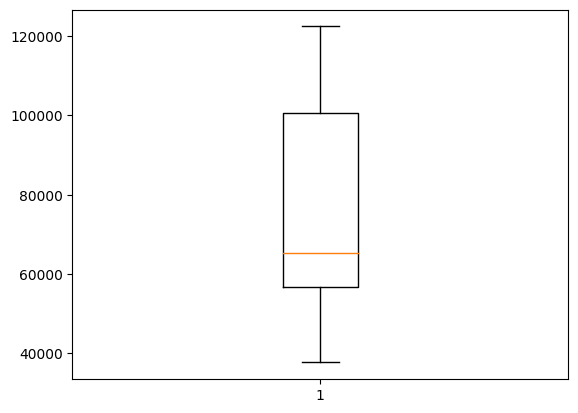

In [8]:
plt.boxplot(salary.Salary)

In [9]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


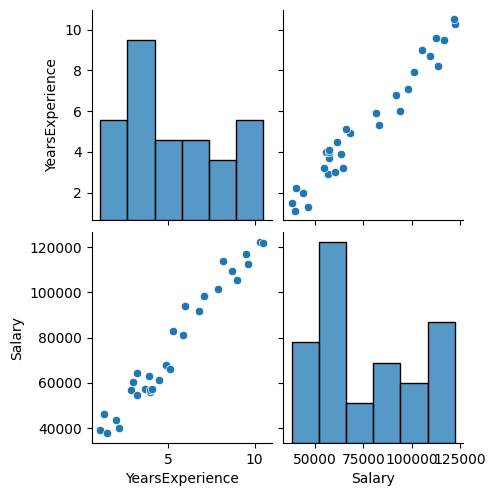

In [10]:
sns.pairplot(salary)

In [11]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

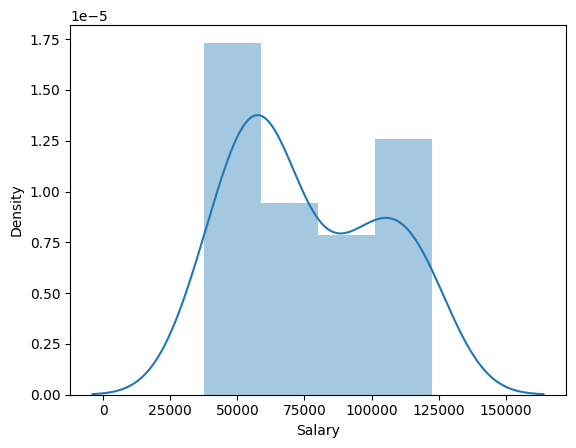

In [12]:
sns.distplot(salary.Salary)

<Axes: xlabel='YearsExperience', ylabel='Density'>

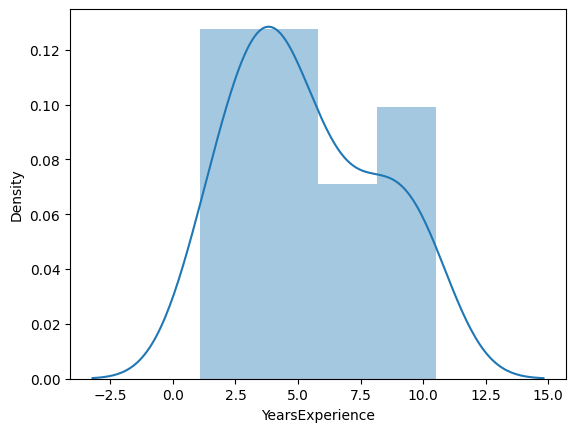

In [13]:
sns.distplot(salary['YearsExperience'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

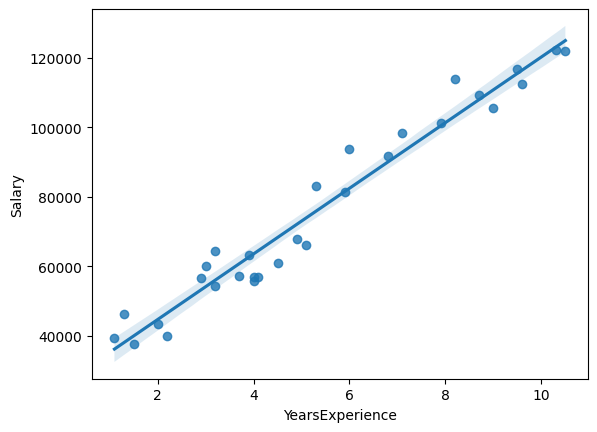

In [14]:
sns.regplot(y=salary['Salary'],x=salary['YearsExperience'])

##Model1

In [15]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=salary).fit()

In [16]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
print("tvalues:\n",model.tvalues,"\n\npvalues:\n",model.pvalues)

tvalues:
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

pvalues:
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
print(model.rsquared,'\n',model.rsquared_adj)

0.9569566641435086 
 0.9554194021486339


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        17:58:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred=model.fittedvalues
# model.predict(salary['YearsExperience'])
salary['Y_hat']=pred
salary.head()

,YearsExperience,Salary,Y_hat
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [21]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
mean_absolute_percentage_error(salary['Salary'],pred)

0.07048034398306607

In [22]:
mse=mean_squared_error(salary['Salary'],pred)
mse

31270951.72228097

In [23]:
RMSE=np.sqrt(mse)
RMSE

5592.043608760662

In [24]:
mean_absolute_error(salary['Salary'],pred)

4644.201289443538

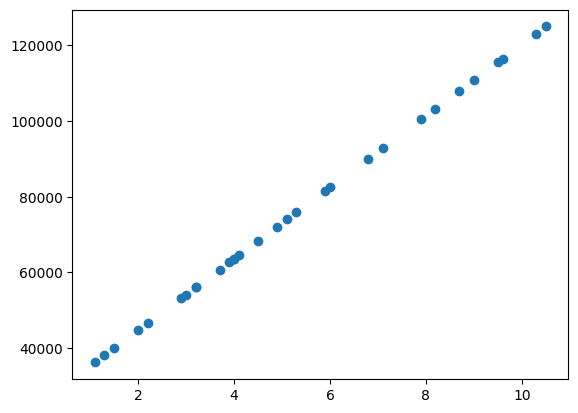

In [25]:
plt.scatter(salary['YearsExperience'],pred)

In [26]:
salary.head()

,YearsExperience,Salary,Y_hat
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [27]:
model.fittedvalues.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [28]:
model.resid.head()  #fitted+resid=actual

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

#Model2

In [29]:
salary['log']=np.log(salary['YearsExperience'])
salary.log.head()

0    0.095310
1    0.262364
2    0.405465
3    0.693147
4    0.788457
Name: log, dtype: float64

In [30]:
model2=smf.ols('Salary~log',salary).fit()

In [31]:
p=model2.fittedvalues
mean_absolute_error(salary['Salary'],p)

8443.584664486354

In [32]:
mse=mean_squared_error(salary['Salary'],p)
np.sqrt(mse)

10302.893706228306

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.25e-13
Time:                        17:58:12   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log         4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        17:58:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **A higher R-squared value indicates a better fit of the model to the data**
#### **A higher adjusted R-squared is desirable.**
#### **models with lower AIC values are preferred**
#### **models with lower BIC values are preferred**
##  ***So Model1 is better than Model2***

In [35]:
newdata=pd.Series([2,3,5])
data=pd.DataFrame(newdata,columns=['YearsExperience'])
data

,YearsExperience
0,2
1,3
2,5


In [36]:
model.predict(data)  #Model1

0    44692.124842
1    54142.087163
2    73042.011806
dtype: float64